## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


You are charged to explore the data to find what makes a movie successful.

Provide 3 concrete recommendations to a “new” movie studio on what films to produce - support via statistical testing.

The business goal is to determine what factors contribute to a movie's success and make recommendations to a new movie studio about what types of films to produce.

Key success metrics to explore:

- Revenue (domestic, foreign, worldwide gross)
- Return on Investment (ROI) (based on budget and revenue)
- Audience and critic ratings (IMDB, Rotten Tomatoes)
- Genre and other features (runtime, popularity)

Utilize Simple Linear Regression to quantify a numeric response variable relationship (revenue, ROI, budget, etc...). 

To provide three specific recommendations to a new movie studio based on data analysis, we need to:

1. Identify which types of movies are most successful based on factors such as revenue, budget, and genre.

2. Support our recommendations with statistical tests and a simple linear regression model to quantify the relationships.

3. Utilize SQL to extract relevant data from the SQLite database (IMDB) and perform further analysis with the merged datasets.

Here's a breakdown of the process:

# Business Understanding

The main objective of this project is to determine what factors contribute to a movie's success, defined by key metrics such as box office revenue, ROI (Return on Investment), and audience/critic ratings. Based on our analysis, I aim to provide concrete recommendations to help a new movie studio decide which types of films to produce in order to maximize financial returns and audience satisfaction.

# Overview of the Datasets/Data Understanding

We have the following datasets to work with:

1. IMDB data (from SQLite im.db) - includes movie basics (title, genre, runtime) and ratings.

2. Box Office Mojo data (bom.movie_gross.csv) - contains domestic and foreign box office gross revenue.

3. TMDB data (tmdb.movies.csv) - includes movie information such as popularity, vote counts, etc.

4. The Numbers data (tn.movie_budgets.csv) - contains production budget and revenue data.

5. Rotten Tomatoes movie info (rt.movie_info.tsv) - includes critic ratings and other info.

6. Rotten Tomatoes reviews (rt.reviews.tsv) - contains critic reviews and scores.


Data Preparation and Key Metrics

1. Revenue: Focus on domestic gross or worldwide gross as a measure of a movie's financial success.
2. ROI: Calculate ROI using the formula: 

ROI= (Worldwide Gross−Production Budget) / Production Budget

3. Ratings: Use IMDB rating or Rotten Tomatoes score to evaluate audience/critic reception.
4. Genre and Runtime: These are key movie features you can assess alongside financial performance.
5. Popularity: This is a good predictor of audience engagement, which drives revenue.

In [10]:
import pandas as pd
import sqlite3

In [11]:
# Load datasets
box_office_data = pd.read_csv('/Users/jeesoojhun/Documents/Flatiron/Phase-2-Project/zippedData/bom.movie_gross.csv')
tmdb_data = pd.read_csv('/Users/jeesoojhun/Documents/Flatiron/Phase-2-Project/zippedData/tmdb.movies.csv')
numbers_data = pd.read_csv('/Users/jeesoojhun/Documents/Flatiron/Phase-2-Project/zippedData/tn.movie_budgets.csv')
rt_movie_info = pd.read_csv('/Users/jeesoojhun/Documents/Flatiron/Phase-2-Project/zippeddata/rt.movie_info.tsv', sep='\t')
rt_reviews = pd.read_csv('/Users/jeesoojhun/Documents/Flatiron/Phase-2-Project/zippedData/rt.reviews.tsv', sep='\t', encoding='ISO-8859-1')


In [12]:
box_office_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [13]:
tmdb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [27]:
numbers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [28]:
rt_movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [29]:
rt_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [14]:
# Connect to the SQLite database
conn = sqlite3.connect('/Users/jeesoojhun/Documents/Flatiron/Phase-2-Project/zippedData/im.db')

# Query to get the list of tables
tables_query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql(tables_query, conn)
print("Tables in the database:")
print(tables)

# Function to get column names for each table
def get_table_info(table_name):
    query = f"PRAGMA table_info({table_name});"
    return pd.read_sql(query, conn)

# Iterate through each table and print column names
for table in tables['name']:
    print(f"\nColumns in {table}:")
    table_info = get_table_info(table)
    print(table_info)


Tables in the database:
            name
0   movie_basics
1      directors
2      known_for
3     movie_akas
4  movie_ratings
5        persons
6     principals
7        writers

Columns in movie_basics:
   cid             name     type  notnull dflt_value  pk
0    0         movie_id     TEXT        0       None   0
1    1    primary_title     TEXT        0       None   0
2    2   original_title     TEXT        0       None   0
3    3       start_year  INTEGER        0       None   0
4    4  runtime_minutes     REAL        0       None   0
5    5           genres     TEXT        0       None   0

Columns in directors:
   cid       name  type  notnull dflt_value  pk
0    0   movie_id  TEXT        0       None   0
1    1  person_id  TEXT        0       None   0

Columns in known_for:
   cid       name  type  notnull dflt_value  pk
0    0  person_id  TEXT        0       None   0
1    1   movie_id  TEXT        0       None   0

Columns in movie_akas:
   cid               name     type  notn

In [15]:
# SQL query to join movie_basics and movie_ratings using movie_id
sql_query = """
SELECT mb.primary_title, mb.genres, mb.runtime_minutes, mr.averagerating, mr.numvotes
FROM movie_basics mb
JOIN movie_ratings mr ON mb.movie_id = mr.movie_id;
"""

# Execute the query and load the data into a DataFrame
imdb_data = pd.read_sql_query(sql_query, conn)

# Preview the data
print(imdb_data.head())

                     primary_title                genres  runtime_minutes  \
0                        Sunghursh    Action,Crime,Drama            175.0   
1  One Day Before the Rainy Season       Biography,Drama            114.0   
2       The Other Side of the Wind                 Drama            122.0   
3                  Sabse Bada Sukh          Comedy,Drama              NaN   
4         The Wandering Soap Opera  Comedy,Drama,Fantasy             80.0   

   averagerating  numvotes  
0            7.0        77  
1            7.2        43  
2            6.9      4517  
3            6.1        13  
4            6.5       119  


In [17]:
imdb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   primary_title    73856 non-null  object 
 1   genres           73052 non-null  object 
 2   runtime_minutes  66236 non-null  float64
 3   averagerating    73856 non-null  float64
 4   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 2.8+ MB


# Data Preparation

- Key steps in data preparation included:

1. Handling missing values in important columns such as foreign gross and worldwide gross. I either filled missing values with medians or excluded data with excessive missing values.

2. Title Standardization: Titles were standardized across datasets to ensure a successful merge of data from different sources.

3. Calculation of ROI: I created a new variable for ROI to measure the profitability of each movie based on the formula:

> ROI= (Worldwide Gross−Production Budget) / Production Budget

4. Merging Datasets: We combined relevant datasets (e.g., budget, revenue, ratings, and genres) into a unified dataset for analysis.

1. IMDB Data (from im.db)

In [16]:
# Check for missing values
print(imdb_data.isnull().sum())


primary_title         0
genres              804
runtime_minutes    7620
averagerating         0
numvotes              0
dtype: int64


In [17]:
# Drop rows where critical columns are missing (e.g., primary_title, genres, ratings)
imdb_data_cleaned = imdb_data.dropna(subset=['primary_title', 'genres', 'runtime_minutes','averagerating'])

In [30]:
# Optional: Impute missing runtimes using the median runtime value
# imdb_data_cleaned['runtime_minutes'].fillna(imdb_data_cleaned['runtime_minutes'].median(), inplace=True)

In [23]:
print(imdb_data_cleaned.isnull().sum())

primary_title      0
genres             0
runtime_minutes    0
averagerating      0
numvotes           0
dtype: int64


2. Box Office Mojo Data(bom.movie_gross.csv)

In [31]:
print(box_office_data.isnull().sum())

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64


In [18]:
# Drop rows where title, domestic, or foreign gross are missing
box_office_data_cleaned = box_office_data.dropna(subset=['title', 'studio','domestic_gross', 'foreign_gross'])
print(box_office_data_cleaned.isnull().sum())

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64


3. TMDB Data (tmdb.movies.csv)

In [23]:
tmdb_data.isnull().sum()

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

4. The Numbers Data(tn.movie_budgets.csv)

In [34]:
numbers_data.isnull().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

5. Rotten Tomatoes Movie Info(rt.movie_info.tsv)

In [37]:
rt_movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [36]:
rt_movie_info.isnull().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [19]:
# Create a copy of rt_movie_info for cleaning
rt_movie_info_cleaned = rt_movie_info.copy()

# Fill the missing values with a placeholder like 'No synopsis available'.
rt_movie_info_cleaned['synopsis'].fillna('No synopsis available', inplace=True)
# Drop rows with missing ratings.
rt_movie_info_cleaned.dropna(subset=['rating'], inplace=True)
# Drop rows with missing genres.
rt_movie_info_cleaned.dropna(subset=['genre'], inplace=True)
# Impute missing values with 'Unknown' in director, writer, theater_date, dvd_date columns.
rt_movie_info_cleaned['director'].fillna('Unknown', inplace=True)
rt_movie_info_cleaned['writer'].fillna('Unknown', inplace=True)
rt_movie_info_cleaned['theater_date'].fillna('Unknown', inplace=True)
rt_movie_info_cleaned['dvd_date'].fillna('Unknown', inplace=True)
# Convert 'runtime' to numeric by removing 'minutes' and converting to integers
rt_movie_info_cleaned['runtime'] = rt_movie_info_cleaned['runtime'].str.replace(' minutes', '').astype(float)
# Impute missing values with the median runtime.
median_runtime = rt_movie_info_cleaned['runtime'].median()
rt_movie_info_cleaned['runtime'].fillna(median_runtime, inplace=True)
# Impute with 'Unknown' for missing values in studio column.
rt_movie_info_cleaned['studio'].fillna('Unknown', inplace=True)




In [20]:
# Fill missing currency values with 'USD'
rt_movie_info_cleaned['currency'].fillna('USD', inplace=True)
# Convert the box_office column to numeric, handling any potential errors
rt_movie_info_cleaned['box_office'] = pd.to_numeric(rt_movie_info_cleaned['box_office'], errors='coerce')

# Calculate the median box_office value
median_box_office = rt_movie_info_cleaned['box_office'].median()

# Fill missing box_office values with the median
rt_movie_info_cleaned['box_office'].fillna(median_box_office, inplace=True)

# Check how many missing values remain
print(rt_movie_info_cleaned.isnull().sum())



id              0
synopsis        0
rating          0
genre           0
director        0
writer          0
theater_date    0
dvd_date        0
currency        0
box_office      0
runtime         0
studio          0
dtype: int64


6. Rotten Tomatoes Reviews(rt.reviews.tsv)

In [49]:
rt_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [48]:
rt_reviews.isnull().sum()

id                0
review         5563
rating        13517
fresh             0
critic         2722
top_critic        0
publisher       309
date              0
dtype: int64

In [21]:
# Drop rows where critic reviews or ratings are missing
rt_reviews_cleaned = rt_reviews.dropna(subset=['review', 'rating', 'critic', 'publisher'])

In [53]:
rt_reviews_cleaned.isnull().sum()

id            0
review        0
rating        0
fresh         0
critic        0
top_critic    0
publisher     0
date          0
dtype: int64

# Standardize Movie titles

In [27]:
import re

# Function to clean and standardize titles
def standardize_title(title):
    title = title.lower()  # Convert to lowercase
    title = re.sub(r'\bep\b', 'episode', title)  # Replace abbreviations like Ep.
    title = re.sub(r'[^\w\s]', '', title)  # Remove punctuation
    title = re.sub(r'\s+', ' ', title).strip()  # Remove extra spaces
    return title

# Apply title standardization across all datasets
imdb_data_cleaned['primary_title'] = imdb_data_cleaned['primary_title'].apply(standardize_title)
box_office_data_cleaned['title'] = box_office_data_cleaned['title'].apply(standardize_title)
tmdb_data['title'] = tmdb_data['title'].apply(standardize_title)
numbers_data['movie'] = numbers_data['movie'].apply(standardize_title)


/var/folders/tc/1ms7n2d57vv5dn_343mwj34r0000gn/T/ipykernel_16547/3059053065.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_data_cleaned['primary_title'] = imdb_data_cleaned['primary_title'].apply(standardize_title)
/var/folders/tc/1ms7n2d57vv5dn_343mwj34r0000gn/T/ipykernel_16547/3059053065.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  box_office_data_cleaned['title'] = box_office_data_cleaned['title'].apply(standardize_title)


In [28]:
# Check for duplicate titles in each dataset
print("Duplicate titles in IMDB data:", imdb_data_cleaned['primary_title'].duplicated().sum())
print("Duplicate titles in Box Office data:", box_office_data_cleaned['title'].duplicated().sum())
print("Duplicate titles in TMDB data:", tmdb_data['title'].duplicated().sum())
print("Duplicate titles in Numbers data:", numbers_data['movie'].duplicated().sum())


Duplicate titles in IMDB data: 3446
Duplicate titles in Box Office data: 0
Duplicate titles in TMDB data: 1880
Duplicate titles in Numbers data: 84


In [ ]:
# Handle duplicates in each dataset

In [29]:
# Drop duplicates by keeping the entry with the least number of missing values
imdb_data_cleaned = imdb_data_cleaned.sort_values(by='runtime_minutes', ascending=False)  # Prioritize movies with runtime data
imdb_data_cleaned = imdb_data_cleaned.drop_duplicates(subset=['primary_title'], keep='first')

# Verify duplicates have been removed
print("Duplicate titles in IMDB data after removal:", imdb_data_cleaned['primary_title'].duplicated().sum())


Duplicate titles in IMDB data after removal: 0


In [30]:
# Drop duplicates by keeping the entry with the least number of missing values
tmdb_data = tmdb_data.sort_values(by='vote_count', ascending=False)  # Prioritize movies with higher vote counts
tmdb_data = tmdb_data.drop_duplicates(subset=['title'], keep='first')

# Verify duplicates have been removed
print("Duplicate titles in TMDB data after removal:", tmdb_data['title'].duplicated().sum())


Duplicate titles in TMDB data after removal: 0


In [31]:
# Drop duplicates by keeping the entry with the least number of missing values
numbers_data = numbers_data.sort_values(by='domestic_gross', ascending=False)  # Prioritize movies with higher gross
numbers_data = numbers_data.drop_duplicates(subset=['movie'], keep='first')

# Verify duplicates have been removed
print("Duplicate titles in Numbers data after removal:", numbers_data['movie'].duplicated().sum())


Duplicate titles in Numbers data after removal: 0


In [32]:
print("Duplicate titles in IMDB data after removal:", imdb_data_cleaned['primary_title'].duplicated().sum())
print("Duplicate titles in TMDB data after removal:", tmdb_data['title'].duplicated().sum())
print("Duplicate titles in Numbers data after removal:", numbers_data['movie'].duplicated().sum())


Duplicate titles in IMDB data after removal: 0
Duplicate titles in TMDB data after removal: 0
Duplicate titles in Numbers data after removal: 0


# Merge Dataset

In [39]:
# Check the cleaned datasets before merging
print(imdb_data_cleaned.head())
print(box_office_data_cleaned.head())
print(tmdb_data.head())
print(numbers_data.head())


               primary_title                 genres  runtime_minutes  \
70280              logistics            Documentary          51420.0   
27683   modern times forever            Documentary          14400.0   
15171              the clock                  Drama           1440.0   
71441  bullfighting memories         Comedy,History           1100.0   
72424                la flor  Drama,Fantasy,Musical            808.0   

       averagerating  numvotes  
70280            5.0        17  
27683            6.2        69  
15171            8.9       219  
71441            8.6         5  
72424            8.5       100  
                                         title studio  domestic_gross  \
0                                  toy story 3     BV     415000000.0   
1                     alice in wonderland 2010     BV     334200000.0   
2  harry potter and the deathly hallows part 1     WB     296000000.0   
3                                    inception     WB     292600000.0   
4   

In [40]:
# Merge IMDB with Box Office data
merged_data = pd.merge(imdb_data_cleaned, box_office_data_cleaned, left_on='primary_title', right_on='title', how='inner')

# Check the result of the merge
print(f"Shape after merging IMDB and Box Office: {merged_data.shape}")
print(merged_data.head())


Shape after merging IMDB and Box Office: (1625, 10)
               primary_title                 genres  runtime_minutes  \
0        mysteries of lisbon  Drama,Mystery,Romance            272.0   
1                 coriolanus      Drama,History,War            192.0   
2  ms dhoni the untold story  Biography,Drama,Sport            184.0   
3               another year            Documentary            181.0   
4                     aurora                  Drama            181.0   

   averagerating  numvotes                      title studio  domestic_gross  \
0            7.5      2928        mysteries of lisbon   MBox        111000.0   
1            8.7      1347                 coriolanus  Wein.        757000.0   
2            7.7     28343  ms dhoni the untold story    FIP       1800000.0   
3            7.2        40               another year    SPC       3200000.0   
4            6.7      1398                     aurora   CGld          5700.0   

  foreign_gross  year  
0         

In [41]:
# Merge with TMDB data
merged_data = pd.merge(merged_data, tmdb_data, on='title', how='left')

# Check the result of the merge
print(f"Shape after merging with TMDB: {merged_data.shape}")
print(merged_data.head())


Shape after merging with TMDB: (1625, 19)
               primary_title                 genres  runtime_minutes  \
0        mysteries of lisbon  Drama,Mystery,Romance            272.0   
1                 coriolanus      Drama,History,War            192.0   
2  ms dhoni the untold story  Biography,Drama,Sport            184.0   
3               another year            Documentary            181.0   
4                     aurora                  Drama            181.0   

   averagerating  numvotes                      title studio  domestic_gross  \
0            7.5      2928        mysteries of lisbon   MBox        111000.0   
1            8.7      1347                 coriolanus  Wein.        757000.0   
2            7.7     28343  ms dhoni the untold story    FIP       1800000.0   
3            7.2        40               another year    SPC       3200000.0   
4            6.7      1398                     aurora   CGld          5700.0   

  foreign_gross  year  Unnamed: 0   genre_id

In [42]:
# Merge with The Numbers data
merged_data = pd.merge(merged_data, numbers_data, left_on='primary_title', right_on='movie', how='left')

# Drop unnecessary columns from The Numbers merge
merged_data.drop(['Unnamed: 0_y', 'movie'], axis=1, inplace=True, errors='ignore')

# Check the final merged dataset
print(f"Shape after final merge: {merged_data.shape}")
print(merged_data.head())


Shape after final merge: (1625, 24)
               primary_title                 genres  runtime_minutes  \
0        mysteries of lisbon  Drama,Mystery,Romance            272.0   
1                 coriolanus      Drama,History,War            192.0   
2  ms dhoni the untold story  Biography,Drama,Sport            184.0   
3               another year            Documentary            181.0   
4                     aurora                  Drama            181.0   

   averagerating  numvotes                      title studio  \
0            7.5      2928        mysteries of lisbon   MBox   
1            8.7      1347                 coriolanus  Wein.   
2            7.7     28343  ms dhoni the untold story    FIP   
3            7.2        40               another year    SPC   
4            6.7      1398                     aurora   CGld   

   domestic_gross_x foreign_gross  year  ...       original_title popularity  \
0          111000.0         14900  2011  ...  Mistérios de Lisboa 

In [43]:
# Check for missing values after merging
print(merged_data.isnull().sum())

primary_title          0
genres                 0
runtime_minutes        0
averagerating          0
numvotes               0
title                  0
studio                 0
domestic_gross_x       0
foreign_gross          0
year                   0
Unnamed: 0           122
genre_ids            122
id_x                 122
original_language    122
original_title       122
popularity           122
release_date_x       122
vote_average         122
vote_count           122
id_y                 555
release_date_y       555
production_budget    555
domestic_gross_y     555
worldwide_gross      555
dtype: int64


In [44]:
# Drop non-critical columns with missing values
merged_data_cleaned = merged_data.drop(['Unnamed: 0', 'id_x', 'id_y', 'genre_ids', 'original_language', 'release_date_y'], axis=1)

# Verify missing values after dropping
print(merged_data_cleaned.isnull().sum())


primary_title          0
genres                 0
runtime_minutes        0
averagerating          0
numvotes               0
title                  0
studio                 0
domestic_gross_x       0
foreign_gross          0
year                   0
original_title       122
popularity           122
release_date_x       122
vote_average         122
vote_count           122
production_budget    555
domestic_gross_y     555
worldwide_gross      555
dtype: int64


In [46]:
# Remove non-numeric characters and convert to numeric
merged_data_cleaned['production_budget'] = merged_data_cleaned['production_budget'].replace('[\$,]', '', regex=True).astype(float)

# Fill missing numeric values with the median
merged_data_cleaned['production_budget'].fillna(merged_data_cleaned['production_budget'].median(), inplace=True)
merged_data_cleaned['vote_average'].fillna(merged_data_cleaned['vote_average'].median(), inplace=True)
merged_data_cleaned['popularity'].fillna(merged_data_cleaned['popularity'].median(), inplace=True)


In [47]:
# Fill missing categorical values with a placeholder 'Unknown'
merged_data_cleaned['original_title'].fillna('Unknown', inplace=True)


In [48]:
print(merged_data_cleaned.isnull().sum())

primary_title          0
genres                 0
runtime_minutes        0
averagerating          0
numvotes               0
title                  0
studio                 0
domestic_gross_x       0
foreign_gross          0
year                   0
original_title         0
popularity             0
release_date_x       122
vote_average           0
vote_count           122
production_budget      0
domestic_gross_y     555
worldwide_gross      555
dtype: int64


In [49]:
# Drop the release_date_x column
merged_data_cleaned.drop(['release_date_x'], axis=1, inplace=True)

# Verify the column is removed
print(merged_data_cleaned.columns)


Index(['primary_title', 'genres', 'runtime_minutes', 'averagerating',
       'numvotes', 'title', 'studio', 'domestic_gross_x', 'foreign_gross',
       'year', 'original_title', 'popularity', 'vote_average', 'vote_count',
       'production_budget', 'domestic_gross_y', 'worldwide_gross'],
      dtype='object')


In [50]:
# Fill missing values in vote_count with the median
merged_data_cleaned['vote_count'].fillna(merged_data_cleaned['vote_count'].median(), inplace=True)

# Verify that missing values have been filled
print(merged_data_cleaned['vote_count'].isnull().sum())


0


In [52]:
# Remove non-numeric characters and convert to numeric
merged_data_cleaned['domestic_gross_y'] = merged_data_cleaned['domestic_gross_y'].replace('[\$,]', '', regex=True).astype(float)
merged_data_cleaned['worldwide_gross'] = merged_data_cleaned['worldwide_gross'].replace('[\$,]', '', regex=True).astype(float)

# Fill missing values in domestic_gross_y and worldwide_gross with the median
merged_data_cleaned['domestic_gross_y'].fillna(merged_data_cleaned['domestic_gross_y'].median(), inplace=True)
merged_data_cleaned['worldwide_gross'].fillna(merged_data_cleaned['worldwide_gross'].median(), inplace=True)

# Verify missing values have been filled
print(merged_data_cleaned[['domestic_gross_y', 'worldwide_gross']].isnull().sum())


domestic_gross_y    0
worldwide_gross     0
dtype: int64


In [53]:
merged_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1625 entries, 0 to 1624
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   primary_title      1625 non-null   object 
 1   genres             1625 non-null   object 
 2   runtime_minutes    1625 non-null   float64
 3   averagerating      1625 non-null   float64
 4   numvotes           1625 non-null   int64  
 5   title              1625 non-null   object 
 6   studio             1625 non-null   object 
 7   domestic_gross_x   1625 non-null   float64
 8   foreign_gross      1625 non-null   object 
 9   year               1625 non-null   int64  
 10  original_title     1625 non-null   object 
 11  popularity         1625 non-null   float64
 12  vote_average       1625 non-null   float64
 13  vote_count         1625 non-null   float64
 14  production_budget  1625 non-null   float64
 15  domestic_gross_y   1625 non-null   float64
 16  worldwide_gross    1625 

In [54]:
# Convert foreign_gross to numeric (handling errors such as commas)
merged_data_cleaned['foreign_gross'] = pd.to_numeric(merged_data_cleaned['foreign_gross'], errors='coerce')

# Verify the conversion
print(merged_data_cleaned['foreign_gross'].head())


0       14900.0
1      315000.0
2    26000000.0
3    16500000.0
4        5100.0
Name: foreign_gross, dtype: float64


In [55]:
# If worldwide_gross is available, use it; otherwise, sum domestic and foreign gross
merged_data_cleaned['box_office'] = merged_data_cleaned['worldwide_gross'].fillna(merged_data_cleaned['domestic_gross_y'] + merged_data_cleaned['foreign_gross'])

# Check the result
print(merged_data_cleaned[['domestic_gross_y', 'foreign_gross', 'worldwide_gross', 'box_office']].head())


   domestic_gross_y  foreign_gross  worldwide_gross  box_office
0        42436289.0        14900.0       87159280.5  87159280.5
1          749641.0       315000.0        2179623.0   2179623.0
2        42436289.0     26000000.0       87159280.5  87159280.5
3         3205706.0     16500000.0       20005613.0  20005613.0
4        42436289.0         5100.0       87159280.5  87159280.5


# Calculate Return on Investment (ROI)

In [56]:
# Calculate ROI
merged_data_cleaned['ROI'] = (merged_data_cleaned['box_office'] - merged_data_cleaned['production_budget']) / merged_data_cleaned['production_budget']

# Check the first few rows
print(merged_data_cleaned[['title', 'production_budget', 'box_office', 'ROI']].head())


                       title  production_budget  box_office       ROI
0        mysteries of lisbon         32500000.0  87159280.5  1.681824
1                 coriolanus         10000000.0   2179623.0 -0.782038
2  ms dhoni the untold story         32500000.0  87159280.5  1.681824
3               another year          8000000.0  20005613.0  1.500702
4                     aurora         32500000.0  87159280.5  1.681824


In [57]:
# Descriptive statistics for numeric columns
print(merged_data_cleaned[['production_budget', 'box_office', 'ROI', 'runtime_minutes', 'averagerating']].describe())


       production_budget    box_office          ROI  runtime_minutes  \
count       1.625000e+03  1.625000e+03  1625.000000      1625.000000   
mean        4.706956e+07  1.487461e+08     3.016038       110.538462   
std         4.856149e+07  2.066489e+08    11.643375        18.890171   
min         1.000000e+05  0.000000e+00    -1.000000        40.000000   
25%         2.400000e+07  5.916869e+07     1.121778        97.000000   
50%         3.250000e+07  8.715928e+07     1.681824       107.000000   
75%         4.500000e+07  1.289559e+08     2.397536       120.000000   
max         4.106000e+08  2.048134e+09   415.564740       272.000000   

       averagerating  
count    1625.000000  
mean        6.500985  
std         0.946057  
min         1.600000  
25%         6.000000  
50%         6.600000  
75%         7.200000  
max         9.200000  


# Data Analysis/EDA

1. Correlation Analysis

In [65]:
# Correlation matrix to understand relationships between variables
correlation_matrix = merged_data_cleaned[['production_budget', 'box_office', 'ROI', 'averagerating', 'popularity', 'runtime_minutes']].corr()
print(correlation_matrix)


                   production_budget  box_office       ROI  averagerating  \
production_budget           1.000000    0.781163 -0.071295       0.109594   
box_office                  0.781163    1.000000  0.066645       0.194145   
ROI                        -0.071295    0.066645  1.000000      -0.053886   
averagerating               0.109594    0.194145 -0.053886       1.000000   
popularity                  0.540633    0.582188  0.045084       0.223241   
runtime_minutes             0.240842    0.209980 -0.066626       0.279626   

                   popularity  runtime_minutes  
production_budget    0.540633         0.240842  
box_office           0.582188         0.209980  
ROI                  0.045084        -0.066626  
averagerating        0.223241         0.279626  
popularity           1.000000         0.217841  
runtime_minutes      0.217841         1.000000  


- Key Takeaways:
1. Production Budget has a strong positive correlation (0.781) with Box Office Revenue: This means that spending more on production is likely to yield more revenue, but there may be diminishing returns, as the correlation is not perfect.

2. Box Office and ROI have only a weak correlation (0.067): Movies that make a lot of money at the box office don’t necessarily have high ROIs, likely because of the significant costs associated with larger productions.

3. Popularity (0.582) is moderately correlated with Box Office success: Popularity plays a role in driving revenue, though it's not as strong as the production budget’s impact.

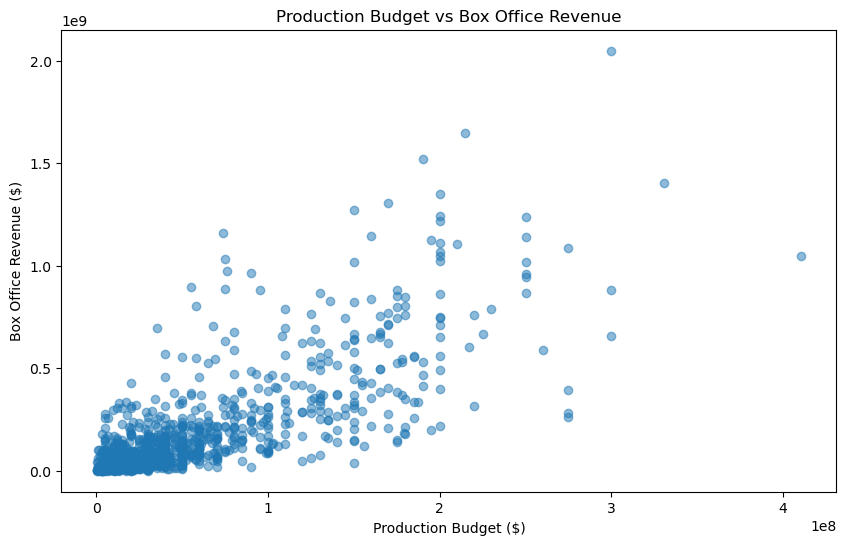

In [58]:
import matplotlib.pyplot as plt

# Scatter plot: Production Budget vs Box Office Revenue
plt.figure(figsize=(10, 6))
plt.scatter(merged_data_cleaned['production_budget'], merged_data_cleaned['box_office'], alpha=0.5)
plt.title('Production Budget vs Box Office Revenue')
plt.xlabel('Production Budget ($)')
plt.ylabel('Box Office Revenue ($)')
plt.show()



Interpretation: There is a clear positive relationship between budget and box office revenue. Higher-budget films tend to generate higher revenue, though there's some variability, especially with films that exceed a $100 million budget.
Insight: While investing in bigger budgets generally increases revenue, there’s variability, so mid-range budgets might be more cost-effective.

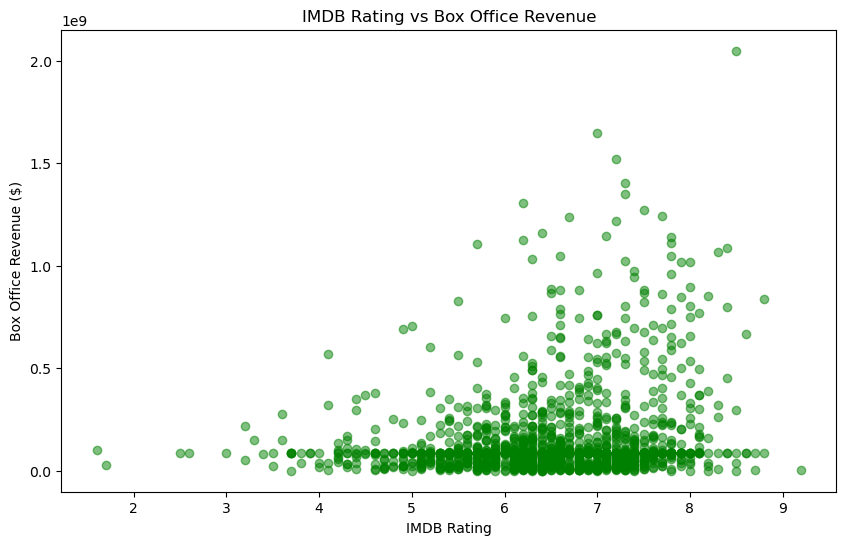

In [59]:
# Scatter plot: IMDB Rating vs Box Office Revenue
plt.figure(figsize=(10, 6))
plt.scatter(merged_data_cleaned['averagerating'], merged_data_cleaned['box_office'], alpha=0.5, color='green')
plt.title('IMDB Rating vs Box Office Revenue')
plt.xlabel('IMDB Rating')
plt.ylabel('Box Office Revenue ($)')
plt.show()



Interpretation: The relationship between IMDB ratings and box office revenue is positive but weaker than expected. Movies with higher ratings (especially above 7) do tend to make more money, but many highly-rated movies still underperform.
Insight: High ratings help, but they are not the main driver of box office performance. Focus on broader audience appeal, marketing, and distribution for success.

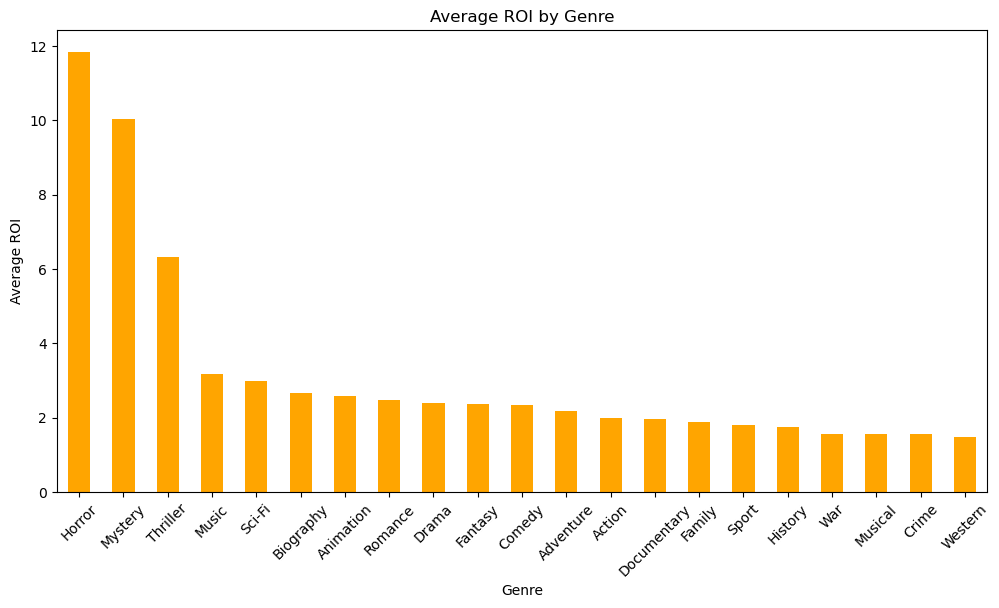

In [60]:
# Split genres and calculate average ROI for each genre
merged_data_cleaned['genres'] = merged_data_cleaned['genres'].str.split(',')
genre_roi = merged_data_cleaned.explode('genres').groupby('genres')['ROI'].mean().sort_values(ascending=False)

# Bar plot of genres vs average ROI
plt.figure(figsize=(12, 6))
genre_roi.plot(kind='bar', color='orange')
plt.title('Average ROI by Genre')
plt.xlabel('Genre')
plt.ylabel('Average ROI')
plt.xticks(rotation=45)
plt.show()



Interpretation: Horror, Mystery, and Thriller genres deliver the highest ROI, while Action, Comedy, and Drama—while popular—show lower ROI.
Insight: To maximize ROI, focusing on lower-budget genres like Horror and Thriller might be beneficial, as they consistently outperform other genres in terms of returns.

# Simple Linear Regression

1. Regression: Budget vs Revenue

Coefficient (Impact of Budget on Revenue): 3.3241651938956123
Intercept: -7720880.438265324
R-squared (Budget vs Revenue): 0.6102152112030885


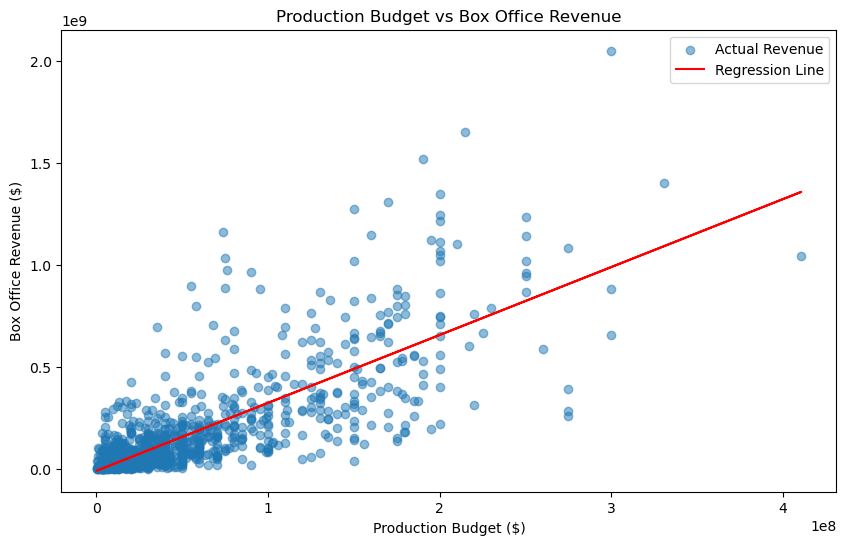

In [61]:
from sklearn.linear_model import LinearRegression

# Prepare data for regression
X_budget = merged_data_cleaned[['production_budget']]
y_revenue = merged_data_cleaned['box_office']

# Fit the model
budget_revenue_model = LinearRegression()
budget_revenue_model.fit(X_budget, y_revenue)

# Print the coefficient and intercept
print(f"Coefficient (Impact of Budget on Revenue): {budget_revenue_model.coef_[0]}")
print(f"Intercept: {budget_revenue_model.intercept_}")

# R-squared value
r_squared_budget = budget_revenue_model.score(X_budget, y_revenue)
print(f"R-squared (Budget vs Revenue): {r_squared_budget}")

# Plot the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_budget, y_revenue, alpha=0.5, label='Actual Revenue')
plt.plot(X_budget, budget_revenue_model.predict(X_budget), color='red', label='Regression Line')
plt.title('Production Budget vs Box Office Revenue')
plt.xlabel('Production Budget ($)')
plt.ylabel('Box Office Revenue ($)')
plt.legend()
plt.show()


> Simple Linear Regression: Production Budget vs Box Office Revenue

- Coefficient (3.32): For every additional dollar spent on the production budget, box office revenue increases by approximately 3.32 dollars. This shows a significant positive relationship between budget and revenue.
- Intercept (-7.72M): If the budget were zero, the model predicts a loss of about $7.72 million. This is not realistic but reflects that revenue is driven largely by other factors as well, such as marketing and brand power.
- R-squared (0.61): This means that 61% of the variability in box office revenue can be explained by the production budget. This is a reasonably strong model, but there are other important factors affecting revenue.

2. Regression: Ratings vs Revenue

Coefficient (Impact of Rating on Revenue): 42407346.225544415
Intercept: -126943397.59309152
R-squared (Ratings vs Revenue): 0.0376921239125807


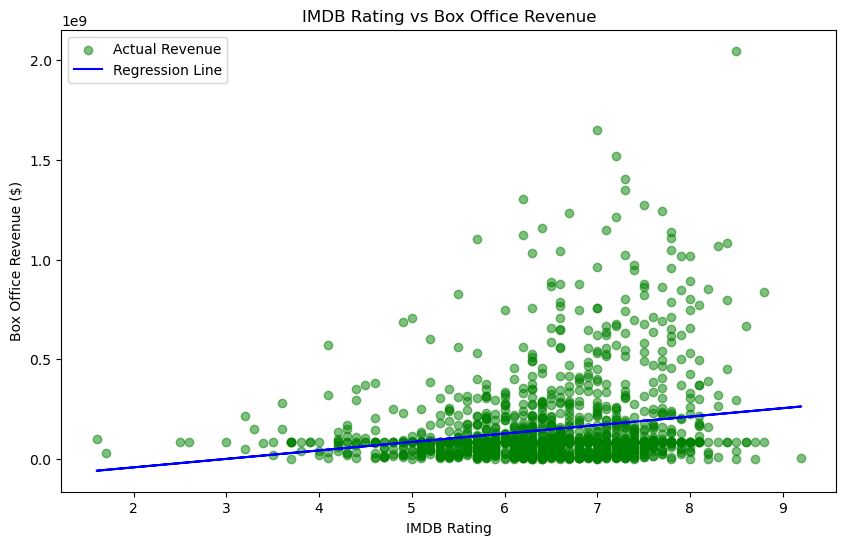

In [62]:
# Prepare data for regression
X_ratings = merged_data_cleaned[['averagerating']]
y_revenue = merged_data_cleaned['box_office']

# Fit the model
rating_revenue_model = LinearRegression()
rating_revenue_model.fit(X_ratings, y_revenue)

# Print the coefficient and intercept
print(f"Coefficient (Impact of Rating on Revenue): {rating_revenue_model.coef_[0]}")
print(f"Intercept: {rating_revenue_model.intercept_}")

# R-squared value
r_squared_ratings = rating_revenue_model.score(X_ratings, y_revenue)
print(f"R-squared (Ratings vs Revenue): {r_squared_ratings}")

# Plot the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_ratings, y_revenue, alpha=0.5, color='green', label='Actual Revenue')
plt.plot(X_ratings, rating_revenue_model.predict(X_ratings), color='blue', label='Regression Line')
plt.title('IMDB Rating vs Box Office Revenue')
plt.xlabel('IMDB Rating')
plt.ylabel('Box Office Revenue ($)')
plt.legend()
plt.show()


> Simple Linear Regression: IMDB Rating vs Box Office Revenue

- Coefficient (42.41M): Each one-point increase in IMDB rating is associated with an increase of about $42.41 million in box office revenue. While this is substantial, it shows that highly rated movies generally tend to perform better.

- Intercept (-$126.94M): A theoretical movie with a rating of zero would lead to a box office loss of $126.94 million, which is obviously not realistic. This just reflects the model's limitations for low-rated movies.

- R-squared (0.038): Only 3.8% of the variability in box office revenue can be explained by IMDB rating. This suggests that ratings alone are not a good predictor of revenue; other factors like marketing, star power, and distribution might play more important roles.

# Statistical Testing

To check if there's a statistically significant difference in ROI across different genres, perform an ANOVA test.

In [63]:
from scipy.stats import f_oneway

# Split genres and calculate ROI for each genre group
action_roi = merged_data_cleaned[merged_data_cleaned['genres'].apply(lambda x: 'Action' in x)]['ROI']
comedy_roi = merged_data_cleaned[merged_data_cleaned['genres'].apply(lambda x: 'Comedy' in x)]['ROI']
drama_roi = merged_data_cleaned[merged_data_cleaned['genres'].apply(lambda x: 'Drama' in x)]['ROI']

# Perform ANOVA test
f_stat, p_value = f_oneway(action_roi.dropna(), comedy_roi.dropna(), drama_roi.dropna())
print(f"ANOVA p-value for ROI across Action, Comedy, Drama genres: {p_value}")


ANOVA p-value for ROI across Action, Comedy, Drama genres: 0.06571645473616151


In [64]:
# Interpretation at a 10% significance level
if p_value < 0.10:
    print("There is evidence at the 10% significance level that ROI differs across genres.")
else:
    print("There is no significant evidence at the 10% level that ROI differs across genres.")


There is evidence at the 10% significance level that ROI differs across genres.


p-value (0.0657): Since this p-value is just above 0.05, it suggests that at the 5% significance level, we cannot reject the null hypothesis. However, at a 10% significance level, we might conclude that Action, Comedy, and Drama genres show some evidence of differences in ROI.

In [66]:
from scipy.stats import f_oneway

# Select genres with high ROI: Horror, Mystery, Thriller
horror_roi = merged_data_cleaned[merged_data_cleaned['genres'].apply(lambda x: 'Horror' in x)]['ROI']
mystery_roi = merged_data_cleaned[merged_data_cleaned['genres'].apply(lambda x: 'Mystery' in x)]['ROI']
thriller_roi = merged_data_cleaned[merged_data_cleaned['genres'].apply(lambda x: 'Thriller' in x)]['ROI']

# Perform ANOVA test on these genres
f_stat, p_value = f_oneway(horror_roi.dropna(), mystery_roi.dropna(), thriller_roi.dropna())
print(f"ANOVA p-value for ROI across Horror, Mystery, Thriller genres: {p_value}")


ANOVA p-value for ROI across Horror, Mystery, Thriller genres: 0.2729977000369987


# Key Recommendations


1. Invest in Mid-Range Budgets for Better Risk-Reward Balance:
While higher budgets generally lead to higher box office revenue, the variability suggests diminishing returns for ultra-high-budget movies. Therefore, the studio should focus on mid-range budgets (e.g., $50M to $150M) for the best balance between investment and return.

2. Capitalize on Popular and High-ROI Genres (Horror, Thriller, Mystery):
The ROI analysis shows that Horror, Thriller, and Mystery are the most profitable genres. The studio should consider producing films in these genres, where production costs are generally lower but returns are high. These genres have proven to be low-risk, high-reward.

3. Don’t Over-Rely on IMDB Ratings to Predict Revenue:
IMDB ratings have a limited impact on box office revenue (R-squared = 0.038), meaning that while good ratings help, they don’t guarantee success. The studio should focus more on effective marketing, star power, and distribution strategy to drive revenue, rather than relying solely on high ratings to predict success.